# Noise and Filter Design

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Noise

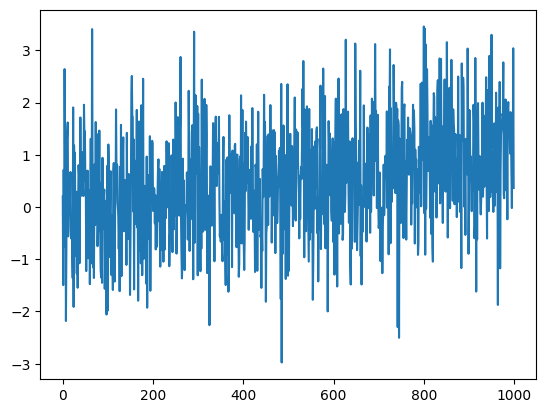

In [2]:
## Gaussian Noise
N = np.linspace(0,1,1000)
x_noise = np.random.normal(N)
plt.plot(x_noise)
plt.show()

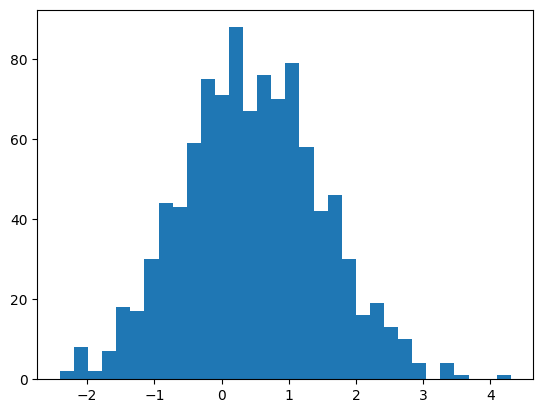

In [3]:
plt.hist(x_noise, bins=32)
plt.show()

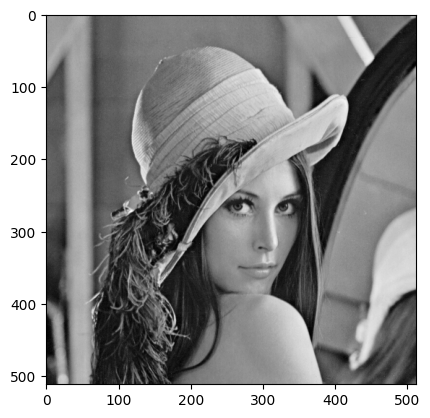

In [3]:
img = cv.imread('lena.png', 0)
plt.imshow(img, cmap='gray')
plt.show()

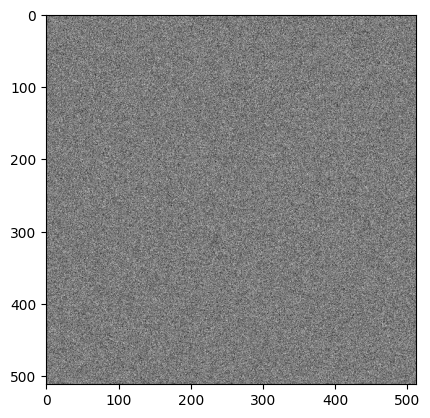

In [4]:
img_noise_gauss = np.random.normal(0, 225, img.shape)
plt.imshow(img_noise_gauss, cmap='gray')

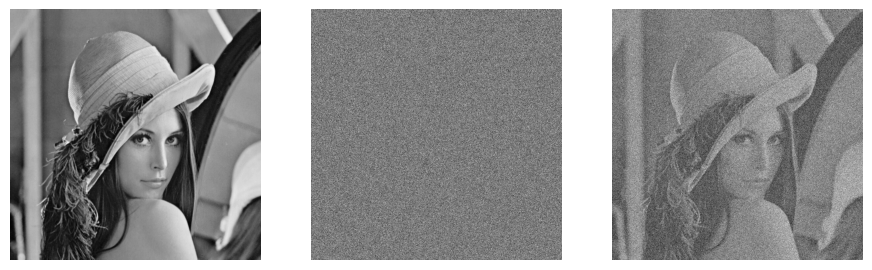

In [5]:
plt.figure(figsize=(11,5))
plt.subplot(131)
plt.imshow(img, cmap='gray'), plt.axis('off')
plt.subplot(132)
plt.imshow(img_noise_gauss, cmap='gray'), plt.axis('off')
plt.subplot(133)
plt.imshow(img+0.2*img_noise_gauss, cmap='gray'), plt.axis('off')
plt.show()

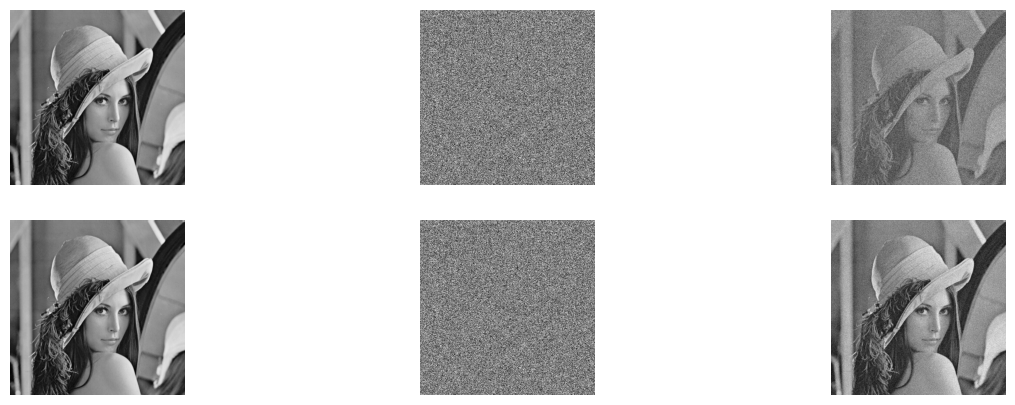

In [8]:
## Uniform Noise

img_noise_uni = np.random.uniform(0, 225, img.shape)
plt.figure(figsize=(15,5))
plt.subplot(231)
plt.imshow(img, cmap='gray'), plt.axis('off')
plt.subplot(232)
plt.imshow(img_noise_uni, cmap='gray'), plt.axis('off')
plt.subplot(233)
plt.imshow(img+0.2*img_noise_gauss, cmap='gray'), plt.axis('off')
plt.subplot(234)
plt.imshow(img, cmap='gray'), plt.axis('off')
plt.subplot(235)
plt.imshow(img_noise_uni, cmap='gray'), plt.axis('off')
plt.subplot(236)
plt.imshow(img+0.2*img_noise_uni, cmap='gray'), plt.axis('off')
plt.show()

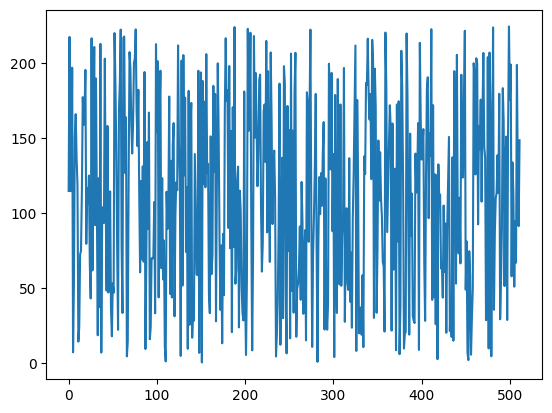

In [8]:
plt.plot(img_noise_uni[0])

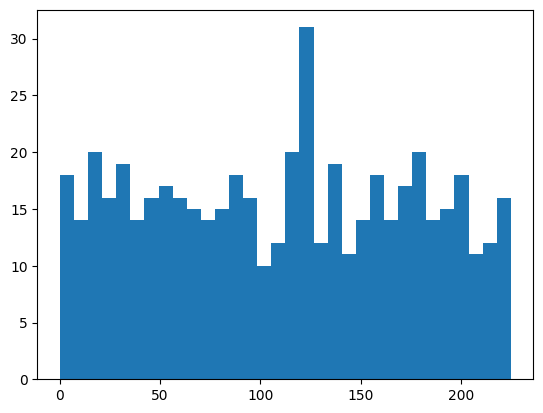

In [9]:
plt.hist(img_noise_uni[0], bins=32)
plt.show()

In [10]:
## Salt and Pepper Noise

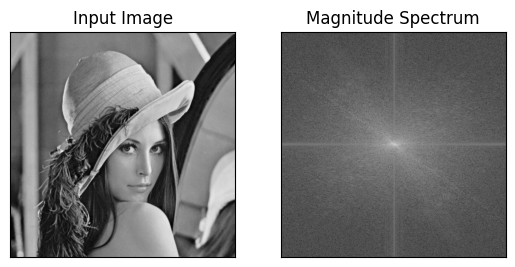

In [6]:
def get_freq(img):
    im = img
    f = np.fft.fft2(im)
    fshift = np.fft.fftshift(f)

    return fshift/img.shape[0]**2

fft_img = get_freq(img)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(20*np.log(np.abs(fft_img)), cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

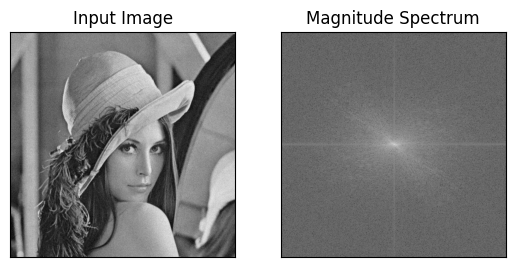

In [11]:
noise_img = img+0.1*img_noise_uni
fft_img = get_freq(noise_img)

plt.subplot(121),plt.imshow(noise_img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(20*np.log(np.abs(fft_img)), cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Spatial Domain Low Pass Filter 

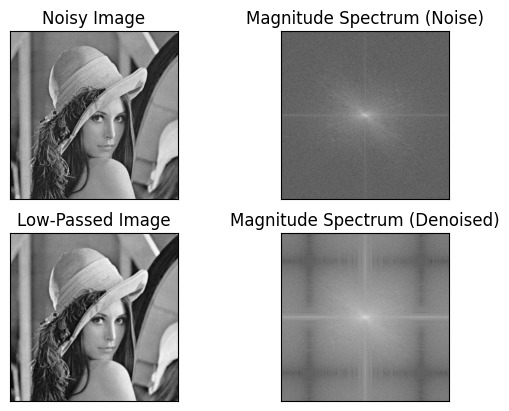

In [11]:
## Blurring as low-pass filter
ave_blur = cv.blur(noise_img, (3,3))
fft_img_noise = get_freq(noise_img)
fft_img_dnoise = get_freq(ave_blur)

plt.subplot(221),plt.imshow(noise_img, cmap = 'gray')
plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(ave_blur, cmap = 'gray')
plt.title('Low-Passed Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(20*np.log(np.abs(fft_img_noise)), cmap = 'gray')
plt.title('Magnitude Spectrum (Noise)'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(20*np.log(np.abs(fft_img_dnoise)), cmap = 'gray')
plt.title('Magnitude Spectrum (Denoised)'), plt.xticks([]), plt.yticks([])
plt.show()

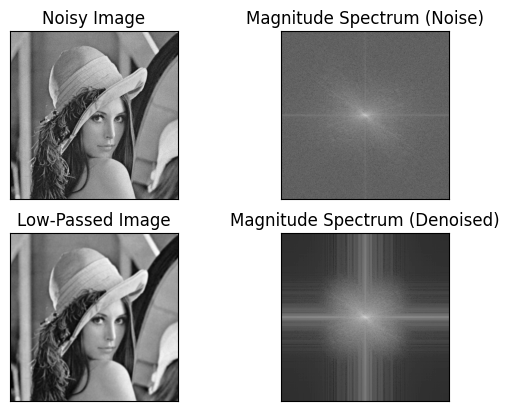

In [13]:
noise_img = img+0.1*img_noise_uni
gauss_blur = cv.GaussianBlur(noise_img,(7,7),0)
fft_img_noise = get_freq(noise_img)
fft_img_dnoise = get_freq(gauss_blur)

plt.subplot(221),plt.imshow(noise_img, cmap = 'gray')
plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(gauss_blur, cmap = 'gray')
plt.title('Low-Passed Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(20*np.log(np.abs(fft_img_noise)), cmap = 'gray')
plt.title('Magnitude Spectrum (Noise)'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(20*np.log(np.abs(fft_img_dnoise)), cmap = 'gray')
plt.title('Magnitude Spectrum (Denoised)'), plt.xticks([]), plt.yticks([])
plt.show()

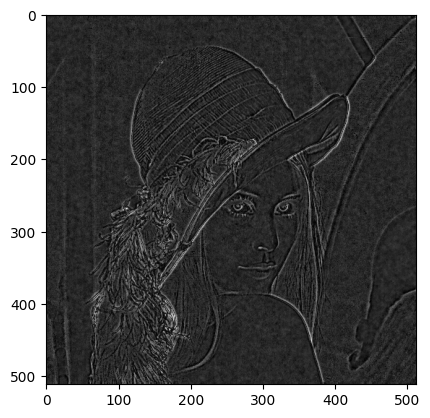

In [27]:
plt.imshow(np.abs(noise_img-gauss_blur), cmap='gray')

## Frequency Domain Low-Pass Filtering

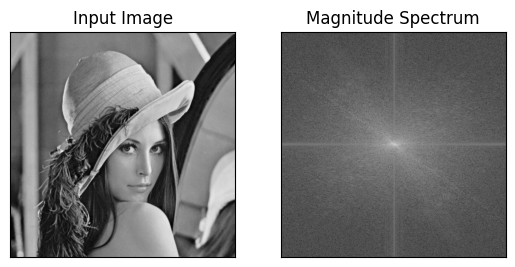

In [14]:
noise_img = img
# noise_img = img+0.1*img_noise_uni
fft_img = get_freq(noise_img)

plt.subplot(121),plt.imshow(noise_img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(20*np.log(np.abs(fft_img)), cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

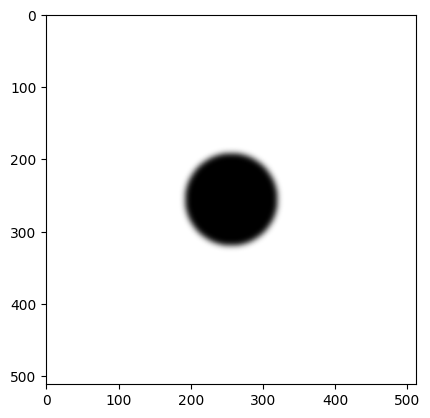

In [28]:
radius = 64
mask = np.zeros_like(img)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2

circ = cv.circle(mask, (cx,cy), radius, (255,255,255), -1)[0]
mask = 255 - mask ## high-pass

mask = cv.GaussianBlur(mask, (25,25), 0)

plt.imshow(mask, cmap='gray')


C:\Users\Admin\AppData\Local\Temp\ipykernel_24000\241818057.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(20*np.log(np.abs(fft_shift_masked)), cmap='gray')


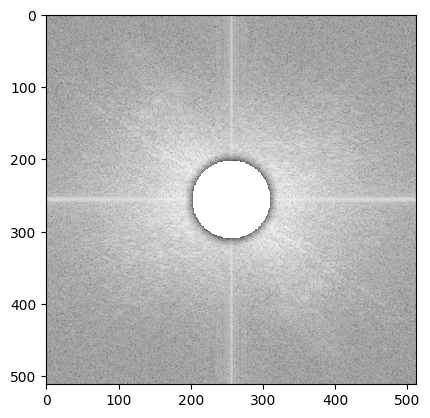

In [29]:
fft_shift_masked = np.multiply(fft_img,mask)
plt.imshow(20*np.log(np.abs(fft_shift_masked)), cmap='gray')

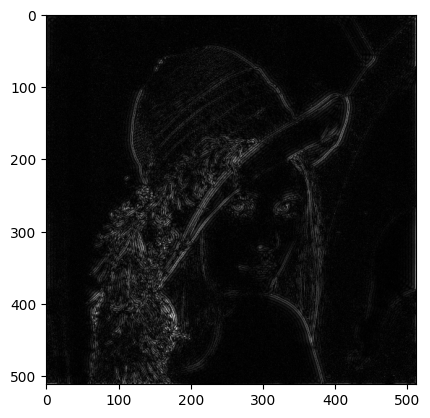

In [30]:
back_ishift_masked = np.fft.ifftshift(fft_shift_masked)
img_filtered = np.fft.ifft2(back_ishift_masked, axes=(0,1))
img_filtered = np.abs(img_filtered).clip(0,255)


plt.imshow(img_filtered, cmap='gray')